## Decision Tree Classifier

Decision tree classifier are attractive models if **interpretability** is of importance.<br>
 -  Interpretability is the degree to which a human can understand the cause of the decision.
 -  Interpretability is the degree to which a human can consistently predict the model’s result
 
Decision tree models break down our data by making decisions based on asking a series of questions.<br>
Decision tree handles both **categorical features** and features with **real numbers**.<br> 

## Building a Decision tree

Decision trees can build complex decision boundaries by dividing the feature space into rectangles.<br>
  - Need to be careful regarding depth of the decision tree
    -  more complex the decision boundaries can easily result in overfitting
  - Note: Feature scaling is not a requirement for decision tree algorithms.

## Spliting and Optimization

**Objective Function** is to maximize the **information gain** at each split.
**Splitting Criteria**
-  There are three splitting critera that are commonly used.
    -  Gini impurity 
    -  Entropy 
    -  Classification error


**Gini Impurity:** It can be understood as a criterion to minimize the probability of **misclassification**. <br>
**Entropy:** It attempts to maximize the mutual information in the tree
Both **Gini Impurity** and **Entropy** yields very similar results.<br>
More benefical of experimenting with different **pruning cut-offs** than different impurity criteria.<br>
**Classification Error:** This is useful for pruning but not **recommended** because it is less sensitive to changes 
in the class **probabilities**


## Exercise

Building a decision tree
Train a decision tree on iris data
-  Use Iris data, features «petal length» and «petal width»
-  Maximum tree depth: 4
-  Impurity criterion: Gini impurity
-  Test size in train_test_split function: 0.3 (random_state = 1) 
-  No need to scale data for decision tree classifier
-  Print out accuracy for training and test set
-  Use features petal width and petal length

In [1]:
#import modules
from sklearn.tree import DecisionTreeClassifier
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
import numpy as np

In [2]:
# Load the data 
iris = datasets.load_iris()
# Select Petal length and petal width
X = iris.data[:, [2, 3]]
y = iris.target

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

In [4]:
# Train the Decision Tree classifier
tree = DecisionTreeClassifier(criterion='gini',max_depth=4,random_state=1)
tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1,
            splitter='best')

In [5]:
#prediction
y_pred = tree.predict(X_test)

In [6]:
#Accuracy for the traning set
print("Accuracy for the training set", tree.score(X_train, y_train))

Accuracy for the training set 0.9714285714285714


In [7]:
#Accuracy for the test Set
print("Accuracy for the training set", tree.score(X_test, y_test))

Accuracy for the training set 0.9777777777777777


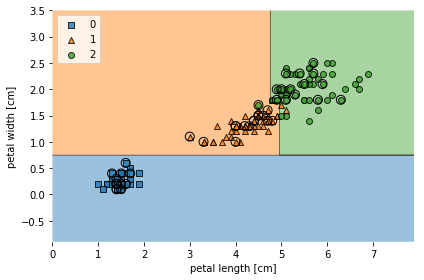

In [8]:
#Plot the Decision Region Using Mlxtend package
X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(X=X_combined,y=y_combined,clf=tree,X_highlight=X_test)
plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')
plt.tight_layout()